# GloVe

GloVe model described in https://nlp.stanford.edu/pubs/glove.pdf.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap
from package2vec.utils.closest_packages import print_closest_packages
from package2vec.utils.co_mat import create_co_mat, print_common_packages

%matplotlib inline

In [5]:
# Get co-occurence matrix for comparison with learned vectors
file_path = 'data/processed/requirements_mc2.csv'
co_mat, word2id = create_co_mat(file_path)

100%|██████████| 39506/39506 [08:42<00:00, 75.61it/s]


## Training on whole dataset

**Whole dataset** - packages with only 1 dependency filtered out, packages occuring only once as dependency filtered out.

Below are embeddings learned with GloVe model with following parameters:

|Embedding dimension| Xmax (cutoff described in GloVe paper)|Optimizer|Learning rate|Alpha|Min count|
| :---: | :---: | :---: | :---: | :---: | :---: |
| 100 | 300 | Adagrad | 0.5 | 0.75 | 2 |




In [14]:
# Load learned vectors
learned_vectors = pd.read_csv('models/glove_whole_dataset/vectors.tsv', sep='\t', header=None)
learned_vectors = learned_vectors.values

# Fit learned vectors to 2 dimension using UMAP
reducer = umap.UMAP(n_neighbors=5)
embedding = reducer.fit_transform(learned_vectors)

Text(0.5, 1.0, 'UMAP projection of learned vectors')

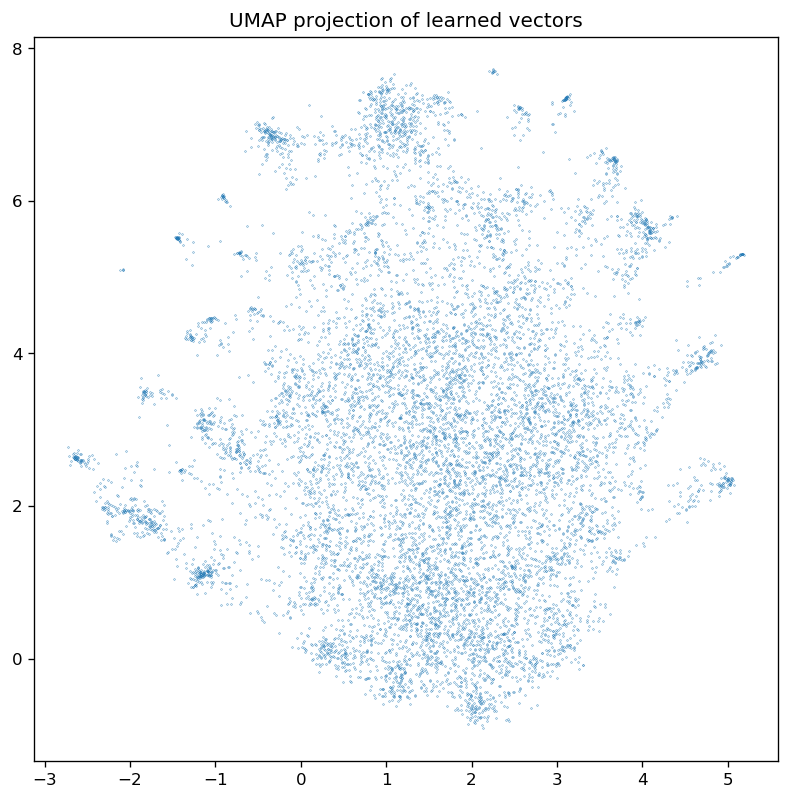

In [15]:
# Plot embedded learned vectors
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 0.05)
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of learned vectors')

Some clusters are forming in the plot of learned vectors fitted to 2d with UMAP above. The clusters are less visible than clusters formed by vectors learned with Skip-gram model on the same dataset. Relation between closest and most co-occuring packages is preserved.

---

As with Skip-gram model - comparing euclidean distances in learned 100 dimensional embedding and co-occurence (using co-occurence matrix), we can see some overlap between most co-occuring packages and closest packages in embedded space.

In [10]:
file_path = 'models/glove_whole_dataset/'
ret = print_closest_packages(file_path = file_path, word = 'numpy', k = 5)
print()
print_common_packages(co_mat, word2id, 'numpy', n=5)

5 closest packages to numpy:
---
scipy
matplotlib
pandas
scikit-learn
tqdm

5 packages co-occuring most with numpy:
---
scipy
pandas
matplotlib
pytest
scikit-learn


In [11]:
ret = print_closest_packages(file_path = file_path, word = 'torch', k = 5)
print()
print_common_packages(co_mat, word2id, 'torch', n=5)

5 closest packages to torch:
---
torchvision
tqdm
sklearn
scikit-learn
seaborn

5 packages co-occuring most with torch:
---
numpy
tqdm
torchvision
scipy
matplotlib


In [12]:
ret = print_closest_packages(file_path = file_path, word = 'tensorflow', k = 5)
print()
print_common_packages(co_mat, word2id, 'tensorflow', n=5)

5 closest packages to tensorflow:
---
keras
h5py
scikit-learn
joblib
tqdm

5 packages co-occuring most with tensorflow:
---
numpy
keras
matplotlib
scipy
pandas


In [13]:
ret = print_closest_packages(file_path = file_path, word = 'pandas', k = 5)
print()
print_common_packages(co_mat, word2id, 'pandas', n=5)

5 closest packages to pandas:
---
numpy
scipy
matplotlib
scikit-learn
tqdm

5 packages co-occuring most with pandas:
---
numpy
scipy
matplotlib
requests
scikit-learn


---

## Training on filtered data

Same as with Skip-gram, we try to learn the GloVe model on filtered data.

All packages occuring less than **10** times as dependency in the dataset were filtered out.

Model was trained with following configurations.

|Embedding dimension| Xmax (cutoff described in GloVe paper)|Optimizer|Learning rate|Alpha|Min count|
| :---: | :---: | :---: | :---: | :---: | :---: |
| 100 | 300 | Adagrad | 0.5 | 0.75 | 10 |


When using bigger value of min_count, the number of unique packages in dataset (size vocabulary) is getting quite small (**1251** for min_count = 20 and **704** for min_count = 40).

In [34]:
# Load learned vectors
learned_vectors = pd.read_csv('models/glove_min_count10/vectors.tsv', sep='\t', header=None)
learned_vectors = learned_vectors.values

# Fit learned vectors to 2 dimension using UMAP
reducer = umap.UMAP(n_neighbors=5)
embedding = reducer.fit_transform(learned_vectors)

Text(0.5, 1.0, 'UMAP projection of learned vectors')

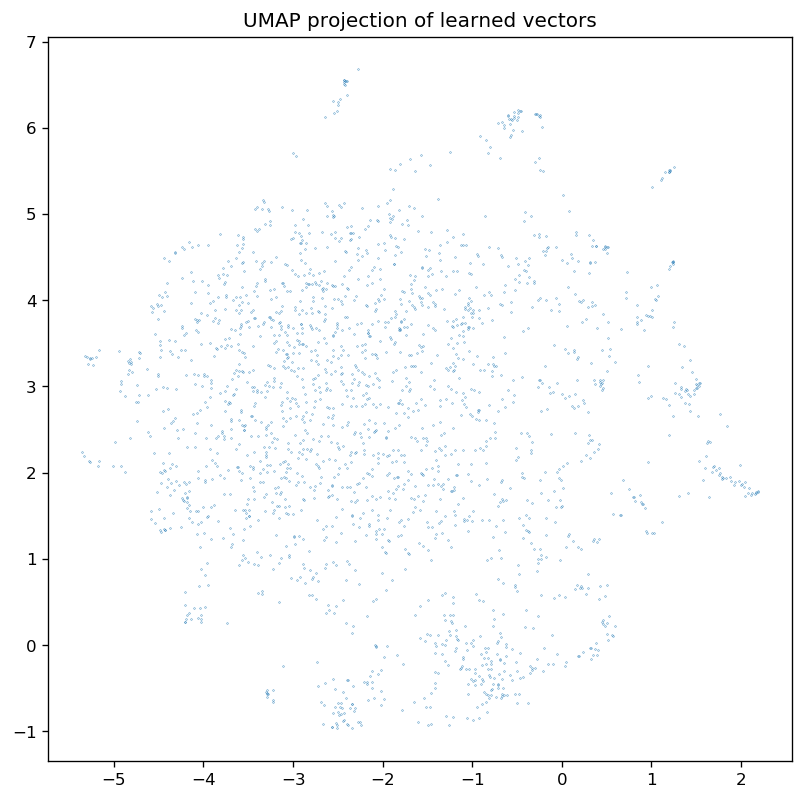

In [35]:
# Plot embedded learned vectors
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 0.05)
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of learned vectors')

No significant clusters are visible in comparison to plot of vectors trained with Skip-gram model on the same dataset, but relation between closest and most co-occuring packages is still preserved:



In [36]:
file_path = 'models/glove_min_count10/'
ret = print_closest_packages(file_path = file_path, word = 'numpy', k = 5)
print()
print_common_packages(co_mat, word2id, 'numpy', n=5)

5 closest packages to numpy:
---
scipy
matplotlib
pandas
scikit-learn
tqdm

5 packages co-occuring most with numpy:
---
scipy
pandas
matplotlib
pytest
scikit-learn


In [37]:
ret = print_closest_packages(file_path = file_path, word = 'torch', k = 5)
print()
print_common_packages(co_mat, word2id, 'torch', n=5)

5 closest packages to torch:
---
tqdm
torchvision
scikit-learn
numpy
seaborn

5 packages co-occuring most with torch:
---
numpy
tqdm
torchvision
scipy
matplotlib


In [38]:
ret = print_closest_packages(file_path = file_path, word = 'tensorflow', k = 5)
print()
print_common_packages(co_mat, word2id, 'tensorflow', n=5)

5 closest packages to tensorflow:
---
keras
scikit-learn
tqdm
tensorflow-gpu
h5py

5 packages co-occuring most with tensorflow:
---
numpy
keras
matplotlib
scipy
pandas


In [39]:
ret = print_closest_packages(file_path = file_path, word = 'pandas', k = 5)
print()
print_common_packages(co_mat, word2id, 'pandas', n=5)

5 closest packages to pandas:
---
numpy
matplotlib
scipy
scikit-learn
tqdm

5 packages co-occuring most with pandas:
---
numpy
scipy
matplotlib
requests
scikit-learn
